<a href="https://colab.research.google.com/github/darthfelipe21/pytorch/blob/main/Autoencoders_Convolucionales_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de anomalías en imágenes industriales usando autoencoders convolusionales


### El objetivo es crear un modelo que pueda determinar o clasificar si la imagen de un producto es normal o posee anomalías

* Lo que se espera es que la garan mayoria de productos no tengan imperfecciones y que solo muy pocos tengan imperfecciones
* Se deberan de balancear los datos en caso de existir un desbalanceamiento
* Construir un modelo de clasificación convolucional no es la mejor mejor opción, ya que podria incurrir en sesgos
* El uso de autoencoder debe de ser la opción indicada para este problema


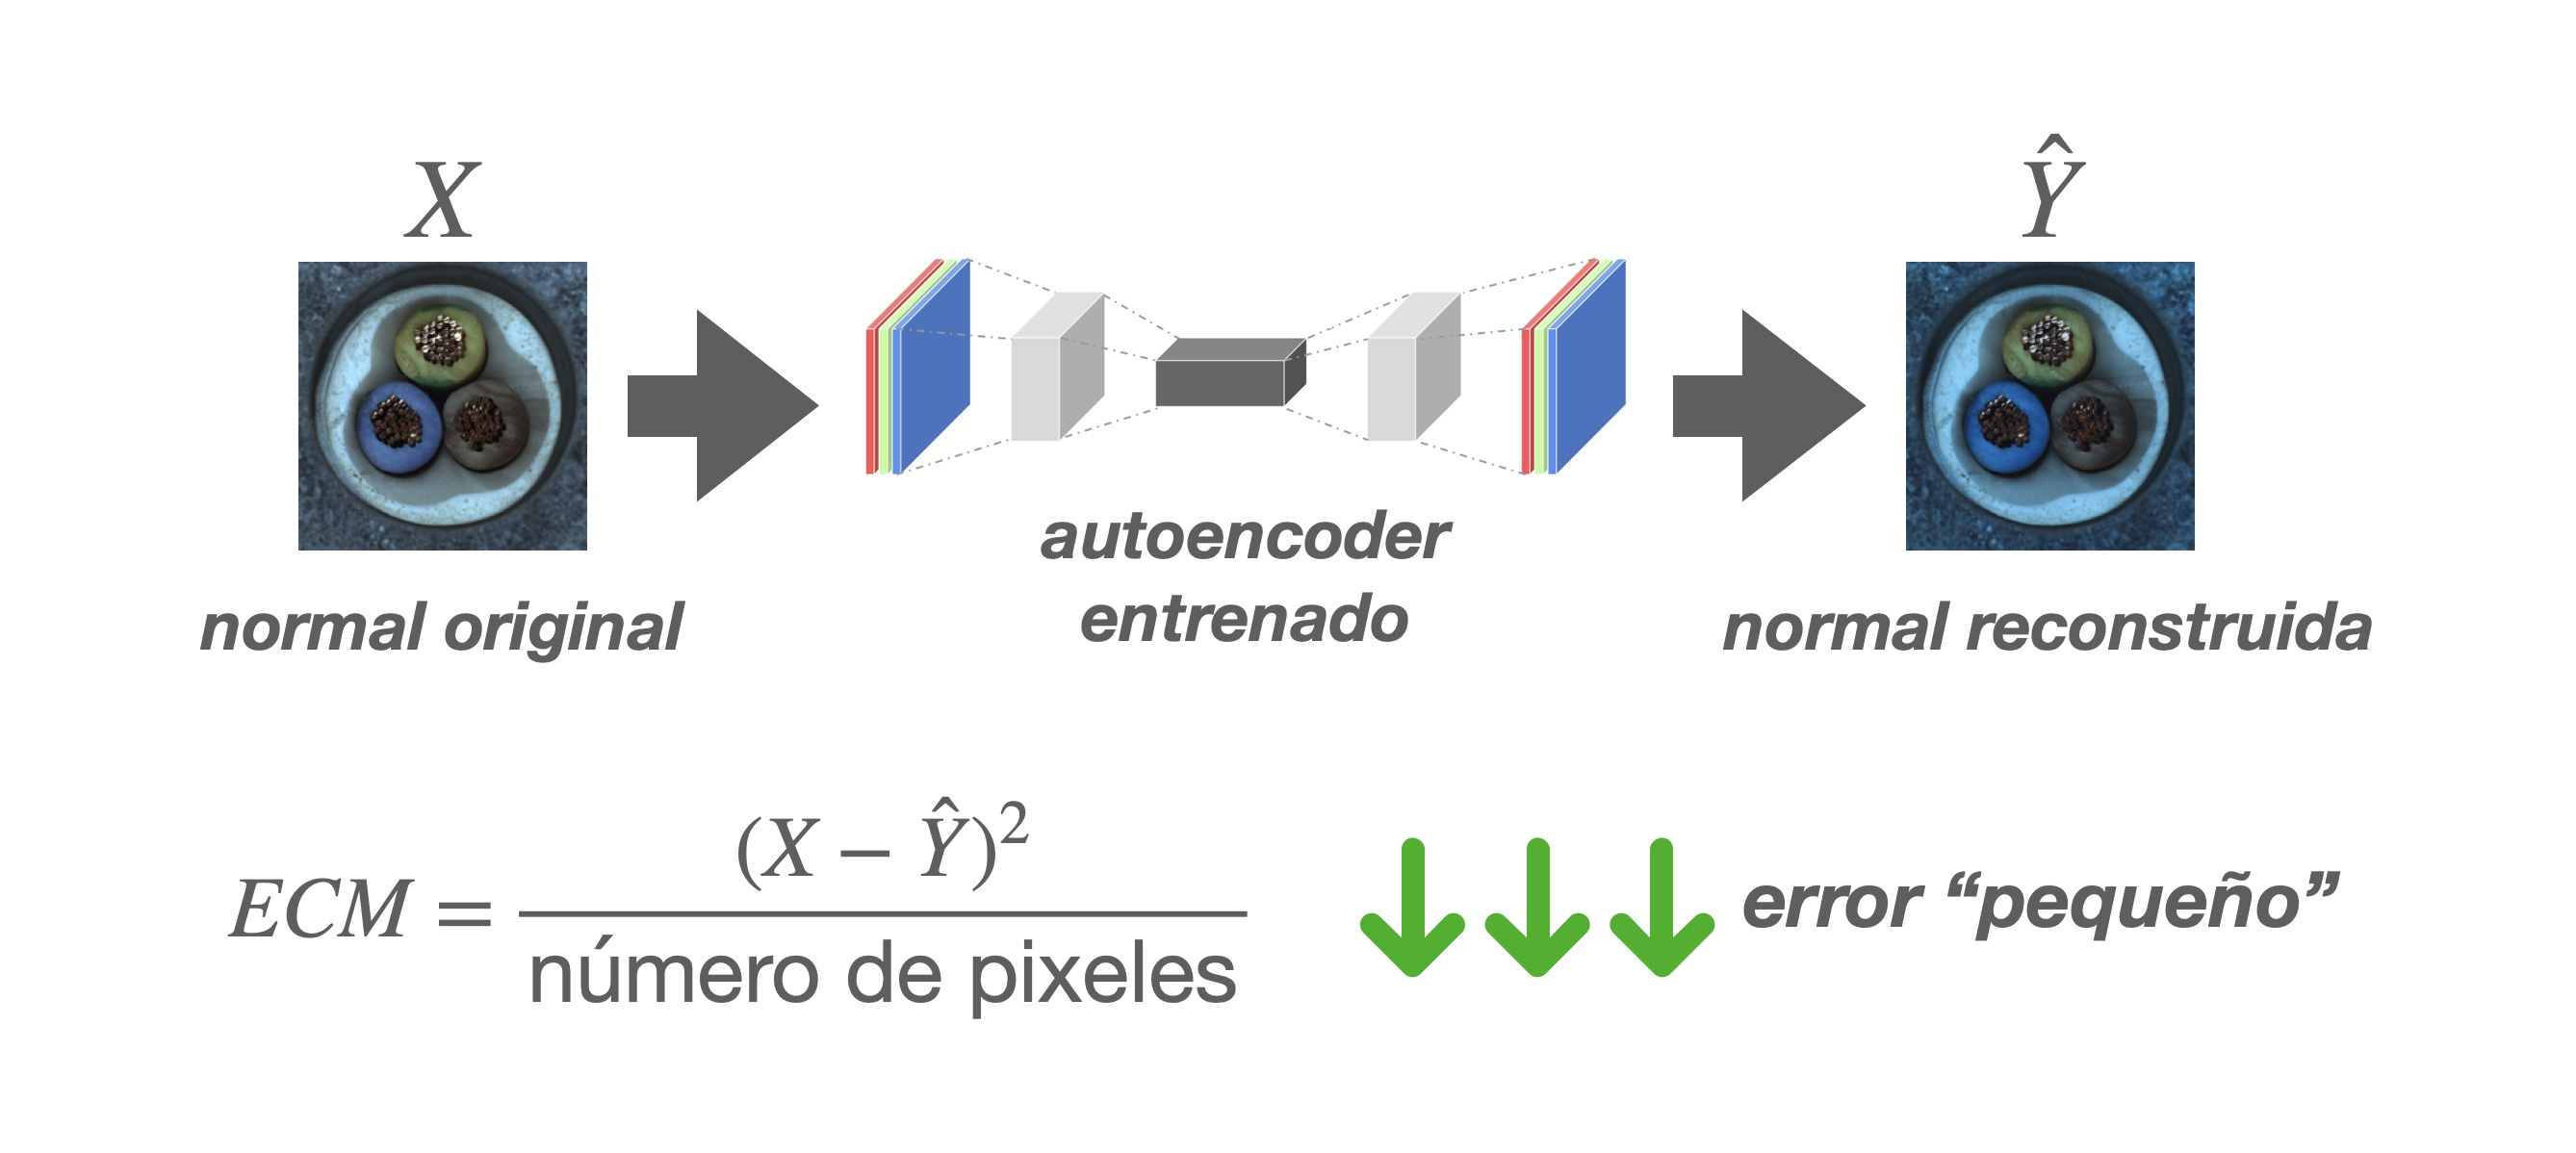


Dataset: mvtec anomaly detection dataset (carpet)

https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz

In [1]:
# Conectar al Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
# Crear un directorio para poder almacenar los datos extraidos desde el Drive
!mkdir -p "/content/extracted_data"

In [9]:
# Descomprimir el archivo .tar y alamacenarlo en la carpeta ya creada
!tar -xf "/content/drive/MyDrive/datasets/carpet.tar.xz" -C "/content/extracted_data/"

## Proyecto sera manejado con Pytorch, para el procesamiento de imagenes

In [12]:
# Importación de componentes que usaremos de pytorch
#!pip install torchvision
from torchvision import datasets, transforms

In [17]:
# Convertir cada imagen en un tensor de pytorch
transform = transforms.Compose([transforms.ToTensor()])

# Leer set de entrenamiento
PATH_TRAIN = "/content/extracted_data/carpet/train"
train_dataset = datasets.ImageFolder(root=PATH_TRAIN, transform=transform)

# Leer set de prueba
PATH_TEST = "/content/extracted_data/carpet/test"
test_dataset = datasets.ImageFolder(root=PATH_TEST, transform=transform)


len(train_dataset), len(test_dataset)

(280, 117)

In [19]:
# Categotización del conjunto de prueba
print(test_dataset.class_to_idx)

{'color': 0, 'cut': 1, 'good': 2, 'hole': 3, 'metal_contamination': 4, 'thread': 5}


In [26]:
# Selección aletoria del conjunto de prueba
import random
import matplotlib.pyplot as plt

idx_to_class = {v : k for k, v in test_dataset.class_to_idx.items()}

idxs = random.sample(range(len(test_dataset)),12)

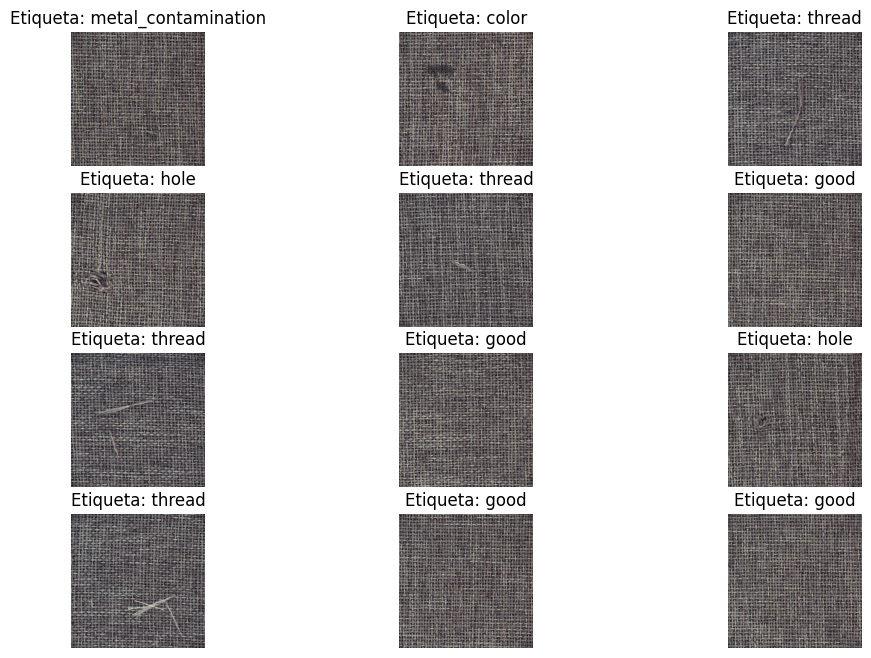

In [30]:
fig, ax = plt.subplots(4, 3, figsize=(12,8))
for i in range(12):
  img, lbl = test_dataset[idxs[i]]
  ax[i//3, i%3].imshow(img.permute(1,2,0)) # Cambiar la posición o el orden en que esta estructurado la imagen, actualmente 3 (rgb) x 1024 (alto) x 1024 (ancho)
  ax[i//3, i%3].set_title(f"Etiqueta: {idx_to_class[lbl]}")
  ax[i//3, i%3].axis('off') # Apagar etiquetas de los ejes X Y
plt.show()

In [31]:
# Caracteristicas de las imagenes
print(img.shape)
print(img.min(), img.max())

torch.Size([3, 1024, 1024])
tensor(0.0510) tensor(1.)


## Implementar el Autoencoder Convolucional